In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=10)

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#A000E0" size=4>Building ANN</font></b>
</font></div>

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/ 255   # normalize pixel values to [0,1]
x_test  = x_test / 255
tf.random.set_seed(9)

# define a sequential neural network
nn = Sequential()

nn.add(Flatten(input_shape=(28,28)))    # Original 28x28 matrix input needs to be flattened

nn.add(Dense(512, activation='relu'))   # Add a densely-connected layer with 512 neurons

nn.add(Dense(256, activation='relu'))   # Add a densely-connected layer with 256 neurons

nn.add(Dense(10, activation='softmax')) # Output layer has 10 neurons, each representing one value of the target variable (0 to 9)

nn.compile(optimizer='adam',            # commonly used optimizer
           loss='sparse_categorical_crossentropy',  # Loss function when categorial target variable is NOT one-hot-encoded
           metrics=['accuracy'])

nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#A000E0" size=4>Training ANN with Cross Validation</font></b>
</font></div>

In [3]:
# Fit: Train the above neural network, returns 'history' that records performance metrics
# One epoch is one round of feed-forward and backpropagation
# A validation set can be set aside to evaluate model performance at the end of each epoch

n_epochs=50
history = nn.fit(x_train, y_train, epochs=n_epochs, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9377 - val_loss: 0.1135 - val_accuracy: 0.9668
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0953 - val_accuracy: 0.9715
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0979 - val_accuracy: 0.9725
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9856 - val_loss: 0.0904 - val_accuracy: 0.9743
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0919 - val_accuracy: 0.9752
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0989 - val_accuracy: 0.9773
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0973 - val_accuracy:

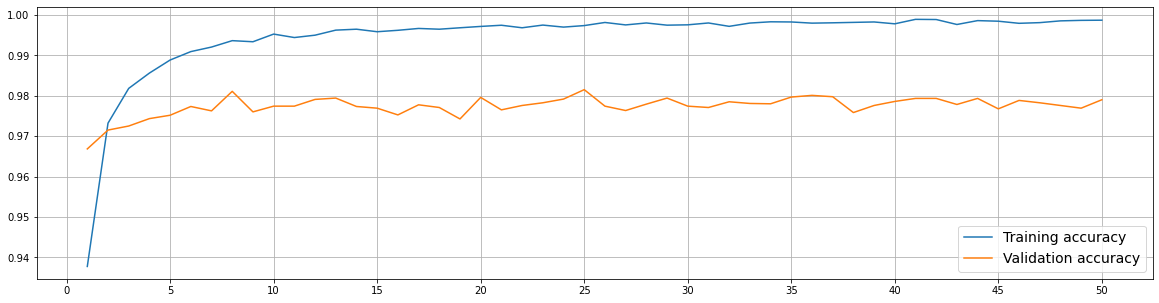

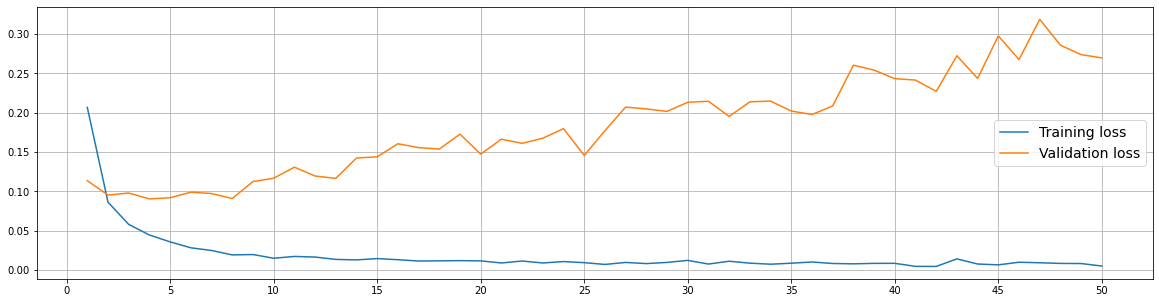

In [7]:
plt.figure(figsize=(20,5))
plt.plot(range(1,n_epochs+1), history.history['accuracy'], label='Training accuracy')
plt.plot(range(1,n_epochs+1), history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.show()

plt.figure(figsize=(20,5))
plt.plot(range(1,n_epochs+1), history.history['loss'], label='Training loss')
plt.plot(range(1,n_epochs+1), history.history['val_loss'], label='Validation loss')
plt.legend(loc='center right', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.show()

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#A000E0">Choose the best number of epochs and retrain the model on the entire training set</font></b>
</font></div>

In [15]:
# Before running the following line, go back to reconstruct the neural network model so that all the weights are reset
%time  nn.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1866 - accuracy: 0.9426
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0800 - accuracy: 0.9756
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9821
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0411 - accuracy: 0.9867
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9896
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0305 - accuracy: 0.9904
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0229 - accuracy: 0.9923
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0219 - accuracy: 0.9927
Wall time: 45.7 s


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#A000E0" size=4>Final Model Test</font></b>
</font></div>

In [16]:
nn.metrics_names

['loss', 'accuracy']

In [17]:
nn.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9804


[0.08277446031570435, 0.980400025844574]

<div class="alert alert-block alert-info"><font color="#000000">

<b><font color="#A000E0" size=3>Save Model</font></b>
    
Save the trained model so that we can load the model in the future without needing to retrain it.
    
</font></div>

In [ ]:
nn.save('my_digit_reader.model')


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#A000E0" size=4>Load and Use the Model</font></b>
</font></div>

In [18]:
import tensorflow as tf
from tensorflow import keras

nn = keras.models.load_model('my_digit_reader.model')

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train/ 255
x_test  = x_test / 255

nn.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9804


[0.08277446031570435, 0.980400025844574]

First 50 samples:
Predict: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Actual:  [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Error:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Misclassified 196 samples out of 10000 samples


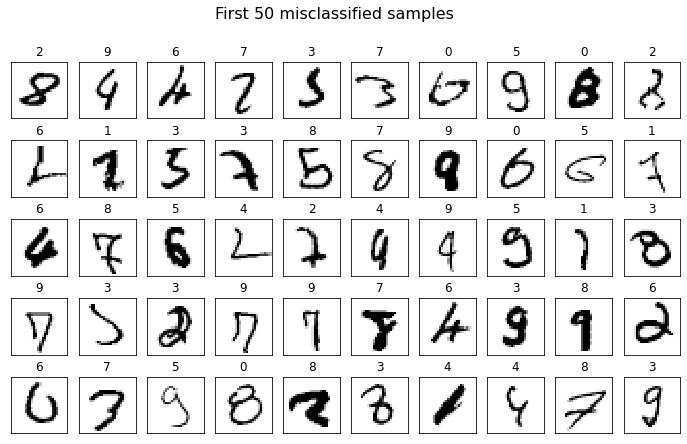

In [19]:
class_names = range(10)


pred_prob = nn.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

lim = 50
print('First 50 samples:')
print('Predict:', pred[0:lim])
print('Actual: ', y_test[0:lim])
print('Error:  ', np.where(pred[0:lim]-y_test[0:lim]==0, 0, 1))

print('\nMisclassified %d samples out of %d samples'%(np.sum(pred != y_test), len(y_test) ))

# find the indices of test samples that are misclassified
misclf = np.argwhere(pred != y_test).flatten()

plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_test[misclf[i]], cmap='Greys', interpolation='none')
    plt.title(class_names[pred[misclf[i]]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('First 50 misclassified samples', fontsize=16)    
plt.show()

# <font color="#0000E0">Building Convolutional Neural Networks using TensorFlow and Keras</font>



In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=10)

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Preparing Data</font></b>
</font></div>

In [2]:
import tensorflow as tf

# Normalize image data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/ 255
x_test  = x_test / 255

# Add a new dimension because CNN requires us to specify number of channels (e.g., 3 channels for RGB colors)
x_train = x_train[:, :, :, np.newaxis]
x_test  = x_test [:, :, :, np.newaxis]
# Equivalent alternative
#x_train = x_train.reshape(-1, 28, 28, 1)
#x_test  = x_test.reshape(-1, 28, 28, 1)

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Building a Neural Network with one Convolutional Layer</font></b>
</font></div>

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

tf.random.set_seed(9)

nn = Sequential()    # define a sequential neural network

#----------------------------------------------------------------------------------------------------------------
conv = Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))    # Conv2D( number of filters, filter size )
nn.add(conv)
nn.add(MaxPool2D())  # default pool_size=(2,2)
#----------------------------------------------------------------------------------------------------------------
nn.add(Flatten())    # no more convolution, flatten data
nn.add(Dense(10, activation='softmax'))  # all pixels of all filtered images are input to the output layer
#----------------------------------------------------------------------------------------------------------------
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.summary()

print('\nCheck param #: conv2d:', 32*10, '  dense: ', (13*13*32+1)*10 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________

Check param #: conv2d: 320   dense:  54090


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Train CNN</font></b>
</font></div>

In [4]:
nn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2142 - accuracy: 0.9400 - val_loss: 0.0825 - val_accuracy: 0.9743
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0790 - accuracy: 0.9767 - val_loss: 0.0692 - val_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0598 - accuracy: 0.9821 - val_loss: 0.0610 - val_accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0583 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0533 - val_accuracy: 0.9826


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Visualize Filters of CNN</font></b>
</font></div>

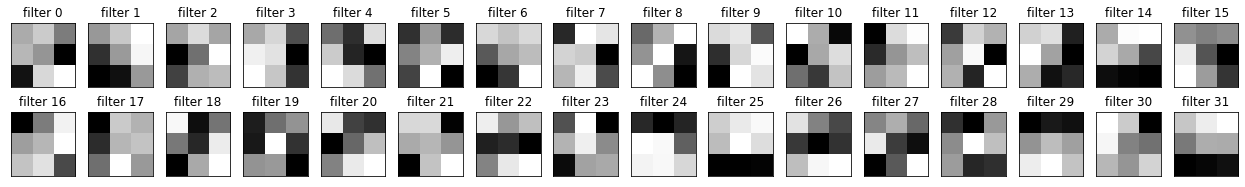

In [5]:
weights = conv.get_weights()[0][:,:,0,:]
plt.figure(figsize=(22,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.imshow(weights[:,:,i], cmap='gray', interpolation='none')
    plt.title('filter '+str(i))
    plt.xticks([])
    plt.yticks([])    
plt.show()

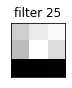

[[ 0.18214454  0.3018547   0.36641178]
 [ 0.10837419  0.39195794  0.24607798]
 [-0.68661213 -0.68541014 -0.66985732]]    w0 = -0.009290404


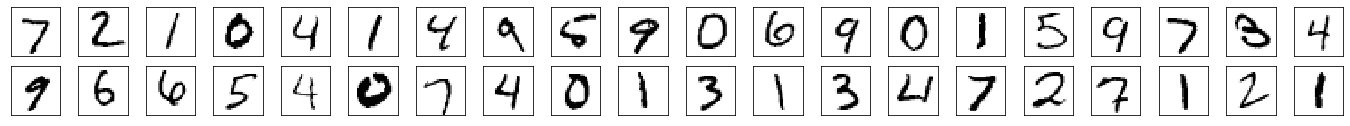

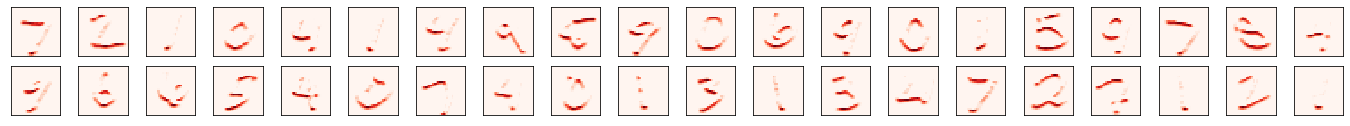

In [25]:
#-------- Show the effect of a specific filter --------------------------
ifilter = 25
ker = weights[:,:,ifilter].astype('double')
w0  = conv.get_weights()[1][ifilter]

plt.figure(figsize=(1,1))
plt.imshow( ker, cmap='gray', interpolation='none')
plt.title('filter '+str(ifilter))
plt.xticks([])
plt.yticks([])
plt.show()

print(ker,'   w0 =', w0)

kernel= tf.reshape(ker, [3, 3, 1, 1])

plt.figure(figsize=(24,2))
for i in range(40):
    plt.subplot(2,20,i+1)
    plt.imshow(x_test[i][:,:,0], cmap='Greys', interpolation='none')
    plt.xticks([])
    plt.yticks([])
plt.show()

plt.figure(figsize=(24,2))
for i in range(40):
    plt.subplot(2,20,i+1)
    
    image = tf.reshape(x_test[i], [1, 28, 28, 1])  # original image
    # filtered image with ReLU
    out = np.maximum(0, tf.nn.conv2d(image, kernel, strides=1, padding='SAME'))
    plt.imshow(out[0,:,:,0], cmap='Reds', interpolation='none')    #color maps: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html

    plt.xticks([])
    plt.yticks([])
plt.show()

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Architecture 2: Multiple Convolutional Layers</font></b>
</font></div>

In [7]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

tf.random.set_seed(9)

nn = Sequential()

#----------------------------------------------------------------------------------------------------------------
nn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))  #Conv2D( number of filters, filter size )
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
nn.add(MaxPool2D())  # default pool_size=(2,2)

#----------------------------------------------------------------------------------------------------------------
nn.add(Flatten())    # no more convolution, flatten data
nn.add(Dense(10, activation='softmax'))  # all pixels of all filtered images are input to the output layer
#----------------------------------------------------------------------------------------------------------------
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.summary()

print('\nCheck param #: conv2d:', 32*10, '   conv2d_1: ', (9*32+1)*64,  '   dense: ', (7*7*64+1)*10 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                31370     
Total params: 50,186
Trainable params: 50,186
Non-trainable params: 0
____________________________________________________

In [31]:
nn.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1480 - accuracy: 0.9560 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 2/6
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0375 - val_accuracy: 0.9870
Epoch 3/6
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0350 - accuracy: 0.9895 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 4/6
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0278 - accuracy: 0.9907 - val_loss: 0.0344 - val_accuracy: 0.9895
Epoch 5/6
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0331 - val_accuracy: 0.9883
Epoch 6/6
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0306 - val_accuracy: 0.9907


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Architecture 3: Multiple Convolutional Layers and "Dropout" Layers</font></b>
</font></div>

In [9]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

tf.random.set_seed(9)

nn = Sequential()

#----------------------------------------------------------------------------------------------------------------
nn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))  #Conv2D( number of filters, filter size )
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Dropout(0.5))    #******* New compared to Architecture 2 *********

#----------------------------------------------------------------------------------------------------------------
nn.add(Flatten())    # no more convolution, flatten data
nn.add(Dense(10, activation='softmax'))  # all pixels of all filtered images are input to the output layer
#----------------------------------------------------------------------------------------------------------------
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.summary()

print('\nCheck param #: conv2d:', 32*10, '   conv2d_1: ', (9*32+1)*64,  '   dense: ', (7*7*64+1)*10 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

In [29]:
nn.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1955 - accuracy: 0.9415 - val_loss: 0.0499 - val_accuracy: 0.9846
Epoch 2/6
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0744 - accuracy: 0.9773 - val_loss: 0.0366 - val_accuracy: 0.9880
Epoch 3/6
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0335 - val_accuracy: 0.9885
Epoch 4/6
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0322 - val_accuracy: 0.9905
Epoch 5/6
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0462 - accuracy: 0.9849 - val_loss: 0.0331 - val_accuracy: 0.9891
Epoch 6/6
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0387 - accuracy: 0.9878 - val_loss: 0.0250 - val_accuracy: 0.9914


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Architecture 4: Multiple Convolutional Layers and Dense Layers</font></b>
</font></div>

In [12]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

tf.random.set_seed(9)

nn = Sequential()

#----------------------------------------------------------------------------------------------------------------
nn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))  #Conv2D( number of filters, filter size )
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
nn.add(MaxPool2D())  # default pool_size=(2,2)

#----------------------------------------------------------------------------------------------------------------
nn.add(Flatten())    # no more convolution, flatten data

nn.add(Dense(128, activation='relu'))  #******* New compared to Architecture 2 *********

nn.add(Dense(10, activation='softmax'))  # all pixels of all filtered images are input to the output layer
#----------------------------------------------------------------------------------------------------------------
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.summary()

print('\nCheck param #: conv2d:', 32*10, '   conv2d_1:', (9*32+1)*64,  '   dense:', (7*7*64+1)*128, '   dense_1:', 129*10 )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [11]:
nn.fit(x_train, y_train, epochs=6, validation_data=(x_test, y_test))

Epoch 1/6
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1246 - accuracy: 0.9618 - val_loss: 0.0421 - val_accuracy: 0.9851
Epoch 2/6
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0416 - val_accuracy: 0.9861
Epoch 3/6
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0289 - val_accuracy: 0.9908
Epoch 4/6
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0310 - val_accuracy: 0.9897
Epoch 5/6
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0325 - val_accuracy: 0.9899
Epoch 6/6
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0265 - val_accuracy: 0.9921


<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=4>Architecture 5: CNN with Multiple Convolutional Layers, Dense Layers, and "Dropout" Layers</font></b>
</font></div>

In [6]:
tf.keras.backend.clear_session()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

tf.random.set_seed(9)

nn = Sequential()

#----------------------------------------------------------------------------------------------------------------
nn.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))  #Conv2D( number of filters, filter size )
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
nn.add(MaxPool2D())  # default pool_size=(2,2)

nn.add(Dropout(0.25)) #******* New compared to Architecture 4 ,  tried value = 0.5, results are worse *********

#----------------------------------------------------------------------------------------------------------------
nn.add(Flatten())    # no more convolution, flatten data

nn.add(Dense(128, activation='relu'))  #******* New compared to Architecture 2 *********

nn.add(Dropout(0.5)) #******* New compared to Architecture 4 *********

nn.add(Dense(10, activation='softmax'))  # all pixels of all filtered images are input to the output layer
#----------------------------------------------------------------------------------------------------------------
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               4

In [7]:
n_epochs=40
%time history = nn.fit(x_train, y_train, epochs=n_epochs, validation_split=0.2)

nn.evaluate(x_test, y_test)

Epoch 1/40
1500/1500 [==============================] - 38s 25ms/step - loss: 0.2341 - accuracy: 0.9285 - val_loss: 0.0542 - val_accuracy: 0.9840
Epoch 2/40
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0895 - accuracy: 0.9725 - val_loss: 0.0445 - val_accuracy: 0.9858
Epoch 3/40
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0690 - accuracy: 0.9799 - val_loss: 0.0359 - val_accuracy: 0.9893
Epoch 4/40
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch 5/40
1500/1500 [==============================] - 54s 36ms/step - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.0348 - val_accuracy: 0.9914
Epoch 6/40
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0442 - accuracy: 0.9860 - val_loss: 0.0354 - val_accuracy: 0.9906
Epoch 7/40
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0392 - accuracy: 0.9874 - val_loss: 0.0315 -

[0.031718529760837555, 0.9933000206947327]

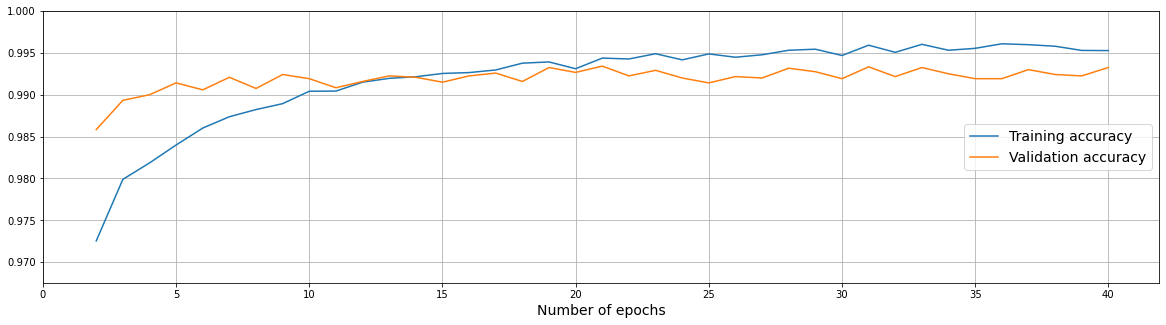

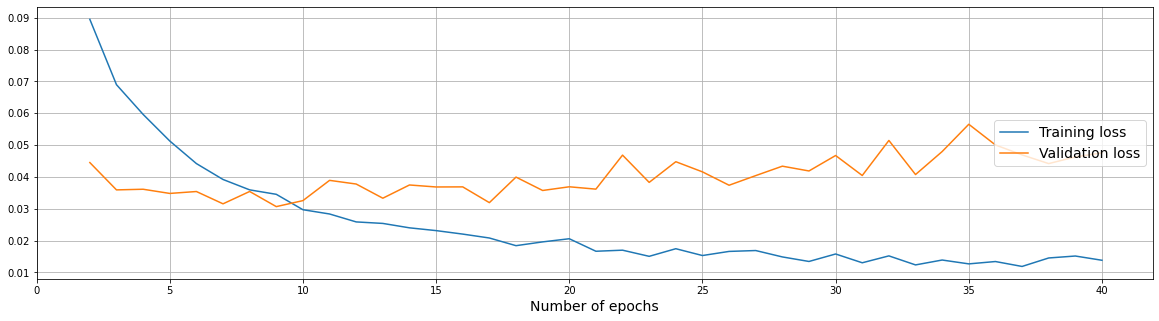

In [8]:
first = 1
plt.figure(figsize=(20,5))
plt.plot(range(first+1,n_epochs+1), history.history['accuracy'][first:], label='Training accuracy')
plt.plot(range(first+1,n_epochs+1), history.history['val_accuracy'][first:], label='Validation accuracy')
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Number of epochs', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.yticks(np.arange(0.95,1.0,0.005))
plt.ylim(history.history['accuracy'][first]-0.005,1)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(range(first+1,n_epochs+1), history.history['loss'][first:], label='Training loss')
plt.plot(range(first+1,n_epochs+1), history.history['val_loss'][first:], label='Validation loss')
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Number of epochs', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.show()

In [27]:
# Following codes are from setting the first dropout = 0.25, and uses the test set, which in theory shouldn't be allowed.

n_epochs=40
%time history = nn.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))

nn.evaluate(x_test, y_test)

Epoch 1/40
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2083 - accuracy: 0.9370 - val_loss: 0.0416 - val_accuracy: 0.9867
Epoch 2/40
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0833 - accuracy: 0.9752 - val_loss: 0.0301 - val_accuracy: 0.9900
Epoch 3/40
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0618 - accuracy: 0.9813 - val_loss: 0.0261 - val_accuracy: 0.9908
Epoch 4/40
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0279 - val_accuracy: 0.9906
Epoch 5/40
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0241 - val_accuracy: 0.9924
Epoch 6/40
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0245 - val_accuracy: 0.9918
Epoch 7/40
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0198 -

[0.024593273177742958, 0.9941999912261963]

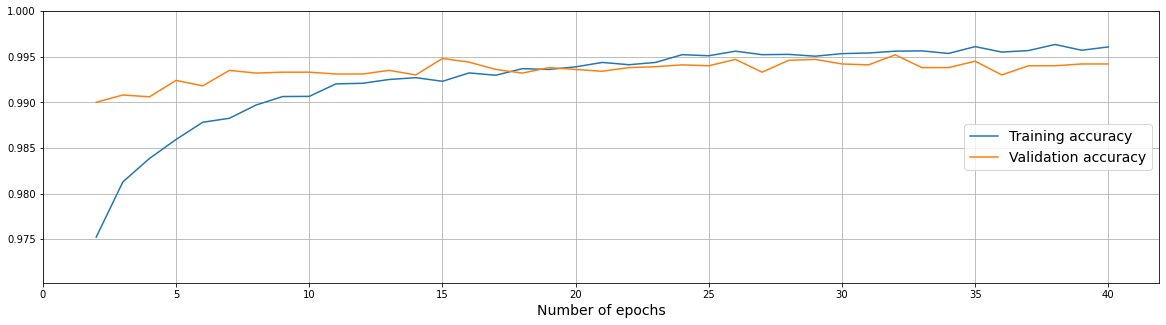

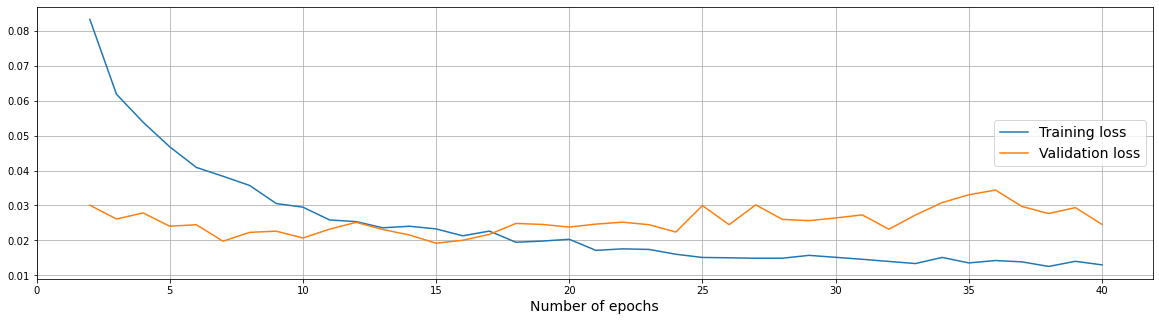

In [28]:
first = 1
plt.figure(figsize=(20,5))
plt.plot(range(first+1,n_epochs+1), history.history['accuracy'][first:], label='Training accuracy')
plt.plot(range(first+1,n_epochs+1), history.history['val_accuracy'][first:], label='Validation accuracy')
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Number of epochs', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.yticks(np.arange(0.95,1.0,0.005))
plt.ylim(history.history['accuracy'][first]-0.005,1)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(range(first+1,n_epochs+1), history.history['loss'][first:], label='Training loss')
plt.plot(range(first+1,n_epochs+1), history.history['val_loss'][first:], label='Validation loss')
plt.legend(loc='center right', fontsize=14)
plt.xlabel('Number of epochs', fontsize=14)
plt.xticks(np.arange(0, n_epochs+1,5))
plt.grid()
plt.show()

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0">Choose the best number of epochs and retrain the model on the entire training set</font></b>
</font></div>

In [ ]:
# Before running the following line, go back to reconstruct the neural network model so that all the weights are reset
n_epochs=15
%time history = nn.fit(x_train, y_train, epochs=n_epochs, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2333 - accuracy: 0.9279 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 2/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1025 - accuracy: 0.9687 - val_loss: 0.0322 - val_accuracy: 0.9892
Epoch 3/15
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0787 - accuracy: 0.9757 - val_loss: 0.0296 - val_accuracy: 0.9891
Epoch 4/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0658 - accuracy: 0.9800 - val_loss: 0.0283 - val_accuracy: 0.9900
Epoch 5/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0622 - accuracy: 0.9812 - val_loss: 0.0251 - val_accuracy: 0.9916
Epoch 6/15
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0575 - accuracy: 0.9828 - val_loss: 0.0276 - val_accuracy: 0.9912
Epoch 7/15
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0520 - accuracy: 0.9838 - val_loss: 0.0232 -

In [17]:
nn.metrics_names

['loss', 'accuracy']

In [18]:
nn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0192 - accuracy: 0.9948


[0.019193852320313454, 0.9947999715805054]

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size='3'>Save Model</font></b>
</font></div>

In [16]:
nn.save('my_CNN_digit_reader.model')

INFO:tensorflow:Assets written to: my_CNN_digit_reader.model\assets


<div class="alert alert-block alert-info"><font color="#000000">

<b><font color="#0000E0" size=3>Load Model</font></b>

We can restart the kernel to verify that the stored model is indeed working.
</font></div>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=10)
import tensorflow as tf

# Load the model
nn = tf.keras.models.load_model('my_CNN_digit_reader.model')

# Load the test data
(x_train_o, y_train), (x_test_o, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train_o/ 255
x_test  = x_test_o / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test .reshape(-1, 28, 28, 1)

# Evaluate the model to verify the performance on the test data
nn.evaluate(x_test, y_test)

Test accuracy: 0.9946


<div class="alert alert-block alert-info"><font color="#000000">

<b><font color="#0000E0" size=3>Use the Model: Recognize digits in the unseen test set</font></b>

<b>TensorFlow</b> model's <b>predict</b> function returns a probabilistic prediction, just like <b>predict_proba</b> function in <b>scikit-learn</b>.
We need to translate probabilistic prediction into the final prediction.
</font></div>

In [19]:
class_names = range(10)


print('Probabilistic Predictions:')
pd.set_option('display.float_format', lambda x: '0' if x<5e-5 else ('%.4f'% x))
pd.DataFrame(nn.predict(x_test)[0:20], columns=class_names)

Probabilistic Predictions:


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1.0000,0,0
1,0,0,1.0000,0,0,0,0,0,0,0
2,0,1.0000,0,0,0,0,0,0,0,0
3,1.0000,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1.0000,0,0,0,0,0
5,0,1.0000,0,0,0,0,0,0,0,0
6,0,0,0,0,1.0000,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1.0000
8,0,0,0,0,0,1.0000,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1.0000


In [20]:
pred_prob = nn.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

print('Actual digit:   ', y_test[0:50])
print('Predicted digit:', pred[0:50])
print('Error:          ', np.where(pred[0:50]-y_test[0:50]==0, 0, 1))

Actual digit:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Predicted digit: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4]
Error:           [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


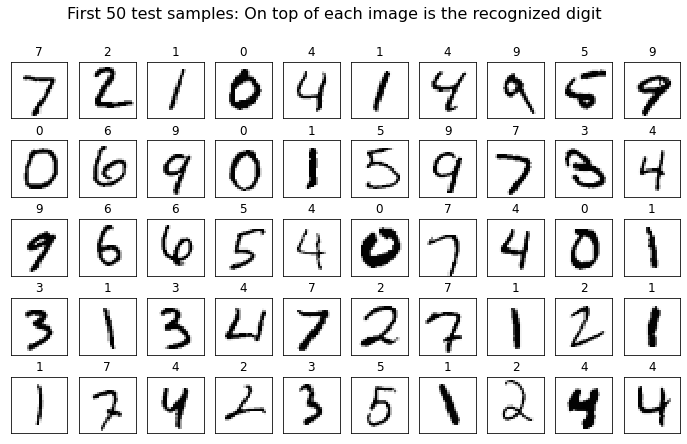

In [21]:
plt.figure(figsize=(12,7))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_test[i], cmap='Greys', interpolation='none')
    plt.title(class_names[pred[i]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('First 50 test samples: On top of each image is the recognized digit', fontsize=16)    
plt.show()

<div class="alert alert-block alert-info"><font color="#000000">
<b><font color="#0000E0" size=3>Misclassified Samples</font></b>
</font></div>

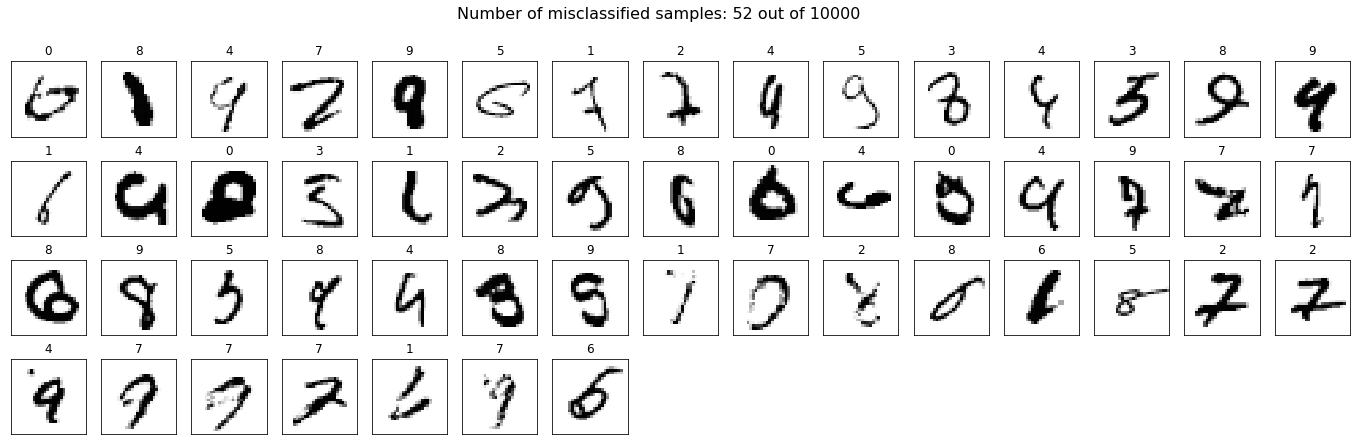

In [33]:
pred_prob = nn.predict(x_test)
pred = np.argmax(pred_prob, axis=1)

# find the indices of test samples that are misclassified
misclf = np.argwhere(pred != y_test).flatten()

plt.figure(figsize=(24,7))
for i in range(52):
    plt.subplot(4,15,i+1)
    plt.imshow(x_test[misclf[i]], cmap='Greys', interpolation='none')
    plt.title(class_names[pred[misclf[i]]])
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Number of misclassified samples: %d out of %d'%(len(misclf), len(y_test)), fontsize=16)
plt.show()